In [36]:
##This was a 3 hour data challenge (with another hour to prep slides) to help a Credit Card Company segment their users

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

main_path = '/Users/PC/Desktop/Insight/CreditCard'

In [110]:
#Loading data
df = pd.read_csv(main_path + '/cc_info.csv', low_memory=False)

In [111]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [112]:
df.shape

(8950, 18)

In [115]:
#Checking to make sure each customer ID is unique
df['CUST_ID'].unique().shape

(8950,)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

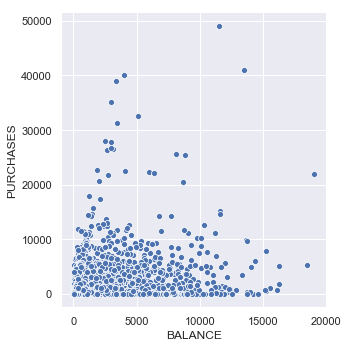

In [15]:
sns.set()
sns.relplot(x="BALANCE", y="PURCHASES", data=df)

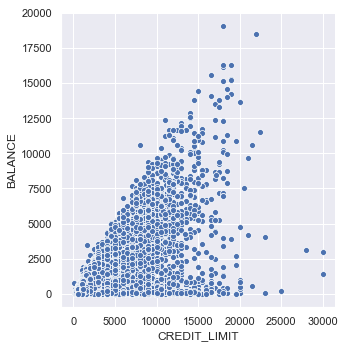

In [121]:
sns.relplot(x="CREDIT_LIMIT", y="BALANCE", data=df)

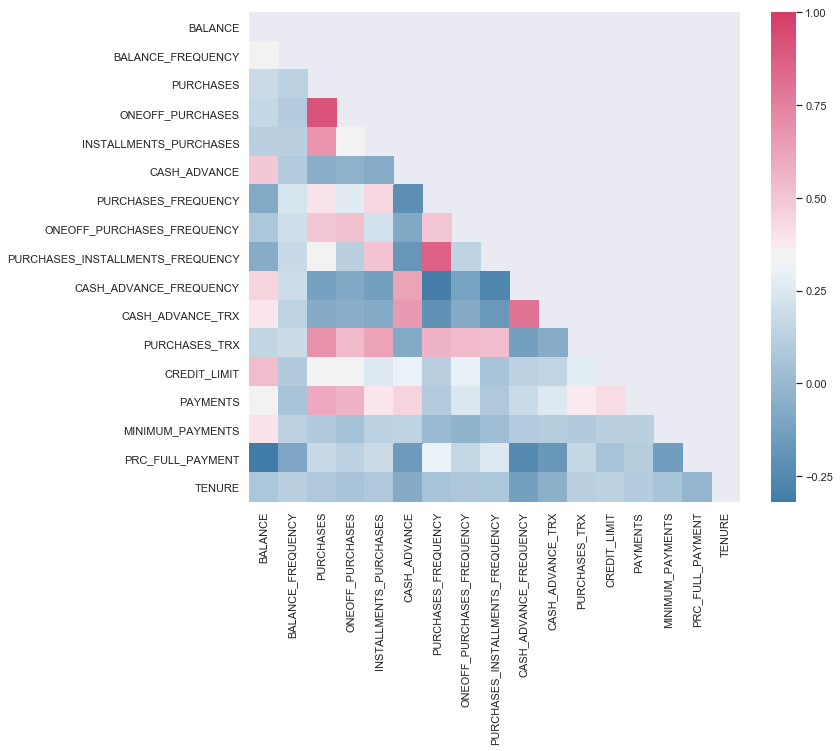

In [132]:
##Making a correlation matrix
corr = df.corr()

# Mask for the upper half
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setting up the figure
f, ax = plt.subplots(figsize=(11, 9))

# Generating the colormap
cmap = sns.diverging_palette(600, 0, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

In [24]:
#Removing the Customer IDs
df1 = df.iloc[:,1:19]

In [25]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [123]:
#Descriptives
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [27]:
#Replacing missing data with median value (largely from the Minimum Payments Column)
df2=df1.fillna(df1.median())

In [124]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ScaledDF = scaler.fit_transform(df2, y=None)

C:\Users\PC\AppData\Local\Continuum\anaconda3\envs\virtualMH\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PC\AppData\Local\Continuum\anaconda3\envs\virtualMH\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [71]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,11):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(ScaledDF)
    centers = km.cluster_centers_

    score = silhouette_score(ScaledDF, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.21004188358425524
For n_clusters = 3, silhouette score is 0.2505645588142349
For n_clusters = 4, silhouette score is 0.1976791965228765
For n_clusters = 5, silhouette score is 0.19302282986637465
For n_clusters = 6, silhouette score is 0.20263819385025553
For n_clusters = 7, silhouette score is 0.2148083074407614
For n_clusters = 8, silhouette score is 0.22168002072569354
For n_clusters = 9, silhouette score is 0.21551979059310708
For n_clusters = 10, silhouette score is 0.22366441627289943


In [126]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(ScaledDF)

In [127]:
#Getting the labels
labels = kmeans2.predict(ScaledDF)
centroids = kmeans2.cluster_centers_

In [93]:
labels=kmeans2.labels_

In [97]:
df3=pd.DataFrame(data=ScaledDF)

In [98]:
df3['LABELS']=labels

In [99]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,LABELS
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,0.0,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,0.0,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,0.0,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,0.0,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,0.0,0


In [100]:
#Putting the labels back into original unscaled Dataset
df4=df2
df4['LABELS']=labels

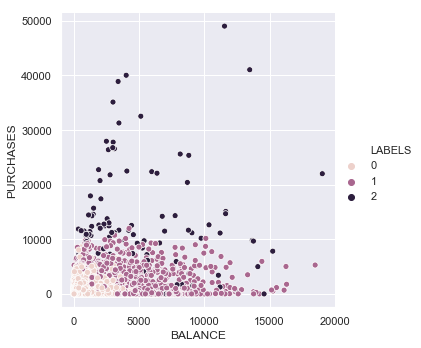

In [128]:
#Plotting by Balance and Purchases

sns.relplot(x="BALANCE", y="PURCHASES", hue="LABELS",data=df4)

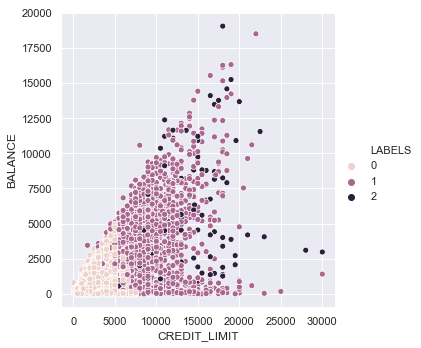

In [117]:
#Plotting by Balance and Credit Limit
sns.relplot(x="CREDIT_LIMIT", y="BALANCE", hue="LABELS", data=df4)

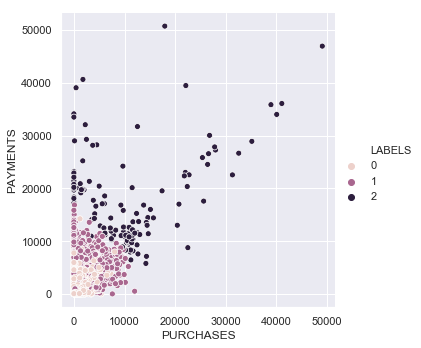

In [104]:
#Plotting by Purchases and Payments
sns.relplot(x="PURCHASES", y="PAYMENTS", hue="LABELS", data=df4)

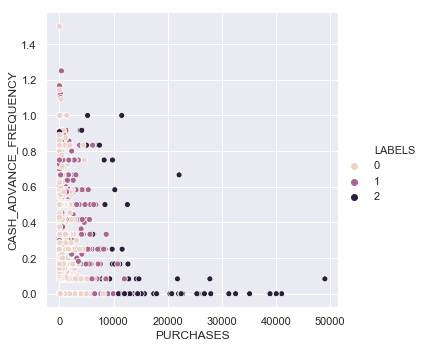

In [129]:
#Plotting by Cash Advance Frequency
sns.relplot(x="PURCHASES", y="CASH_ADVANCE_FREQUENCY", hue="LABELS", data=df4)